In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [2]:
df = pd.read_csv("titanic.csv", index_col = "PassengerId")

In [3]:
df.shape

(891, 11)

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Task 1.

In [5]:
sex = df["Sex"].value_counts()
print(sex)

f = open("task01_1.txt", "w")
f.write(f"{sex.male} {sex.female}")
f.close()

male      577
female    314
Name: Sex, dtype: int64


### Task 2.

In [6]:
survived = df["Survived"].value_counts()
print(survived)

f = open("task01_2.txt", "w")
f.write("{:.2f}".format(survived[1] * 100 / df["Survived"].count()))
f.close()

0    549
1    342
Name: Survived, dtype: int64


### Task 3.

In [7]:
ticket_classes = df["Pclass"].value_counts()
print(ticket_classes)

f = open("task01_3.txt", "w")
f.write("{:.2f}".format(ticket_classes[1] * 100 / df["Pclass"].count()))
f.close()

3    491
1    216
2    184
Name: Pclass, dtype: int64


### Task 4.

In [8]:
print(df["Age"].mean(), df["Age"].median())

f = open("task01_4.txt", "w")
f.write("{:.2f} {:.2f}".format(df["Age"].mean(), df["Age"].median()))
f.close()

29.69911764705882 28.0


### Task 5.

0.41483769862015263


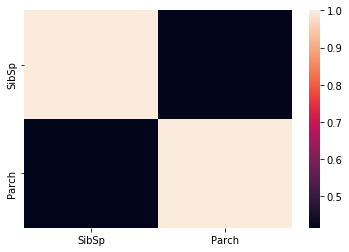

In [9]:
corr = df[["SibSp", "Parch"]].corr(method="pearson")
sns.heatmap(corr)

print(corr["SibSp"]["Parch"])

f = open("task01_5.txt", "w")
f.write("{:.2f}".format(corr["SibSp"]["Parch"]))
f.close()

### Task 6.

In [10]:
woman_names = []

names = df["Name"].where(df["Sex"] == "female").dropna()

for name in names:
    woman_names.append(name[name.find(".") + 2:])

def find_most_common_name(names):
    woman_names = []
    
    for name in names:
        
        if len(name.split()) == 1:
            name = re.sub(r'[^\w]', ' ', name).strip()
            woman_names.append(name)
            
        parentheses = re.findall(r"\((.*?)\)", name)
        if parentheses:
            woman_names.append(parentheses[0].split()[0])
            
        quotes = re.findall(r"(\w+) \".*?\"", name)
        if quotes:
            woman_names.append(quotes[0])
    
    return woman_names

list_of_names = find_most_common_name(woman_names)

frequency_list = {name:list_of_names.count(name) for name in list_of_names}
frequency_list = sorted(frequency_list.items(), key=lambda item: item[1], reverse=True)
frequency_list[0]

('Mary', 12)

In [11]:
f = open("task01_6.txt", "w")
f.write(frequency_list[0][0])
f.close()